In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Comprises of data from 2015-2020
df = pd.read_csv('https://raw.githubusercontent.com/hemil26/NFT-Dataset/master/nft_sales.csv')

#Setting seaborn style
sns.set(style='darkgrid', palette='bright')

#Removing column truncation and 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [3]:
#Checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    object
 2   Buyers       250 non-null    object
 3   Txns         250 non-null    object
 4   Owners       244 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [4]:
#Cleaning the dataset
df.rename(columns = {'Sales':'Sales in USD','Txns':'Transactions'}, inplace = True)
df['Sales in USD'] = df['Sales in USD'].str.replace(',', '')
df['Sales in USD'] = df['Sales in USD'].str.replace('$', '')
df['Buyers'] = df['Buyers'].str.replace(',','')
df['Transactions'] = df['Transactions'].str.replace(',','')
df['Owners'] = df['Owners'].str.replace(',','')
df=df.dropna()

C:\Users\dymar\AppData\Local\Temp/ipykernel_7424/3250027754.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Sales in USD'] = df['Sales in USD'].str.replace('$', '')


In [5]:
# CONVERTING STRING NUMERICALS TO INT
df['Sales in USD'] = df['Sales in USD'].astype('int64')
df['Buyers'] = df['Buyers'].astype('int64')
df['Transactions'] = df['Transactions'].astype('int64')
df['Owners'] = df['Owners'].astype('int32')

In [6]:
#Can search this way specifically
cryptopunk_collection = df[df['Collections'] == "CryptoPunks"]

#Summing total sales
sum_sales = cryptopunk_collection['Sales in USD'].sum()

#Print results
print(f"Total Sales of the 'CryptoPunks' Collection is ${sum_sales:,}")
cryptopunk_collection

Total Sales of the 'CryptoPunks' Collection is $1,664,246,968


,Collections,Sales in USD,Buyers,Transactions,Owners
1,CryptoPunks,1664246968,4723,18961,3289


In [7]:
#Or this way if there are multiple collections with the same name
bored_collection = df[df['Collections'].str.contains("Bored")]

#Summing total sales
sum_sales = bored_collection['Sales in USD'].sum()

#Print results
print(f"Total Sales of the 'Bored Ape' Collection is ${sum_sales:,}")
bored_collection

Total Sales of the 'Bored Ape' Collection is $982,841,231


,Collections,Sales in USD,Buyers,Transactions,Owners
3,Bored Ape Yacht Club,783882186,8284,22584,5862
21,Bored Ape Kennel Club,108210267,5622,13715,5013
31,Bored Ape Chemistry Club,79456705,1454,2508,1
126,Bored Mummy Waking Up,11292073,6030,14816,3682


In [8]:
#Combining both dataframes
result = cryptopunk_collection.append(bored_collection)

In [9]:
#Checking
result

,Collections,Sales in USD,Buyers,Transactions,Owners
1,CryptoPunks,1664246968,4723,18961,3289
3,Bored Ape Yacht Club,783882186,8284,22584,5862
21,Bored Ape Kennel Club,108210267,5622,13715,5013
31,Bored Ape Chemistry Club,79456705,1454,2508,1
126,Bored Mummy Waking Up,11292073,6030,14816,3682


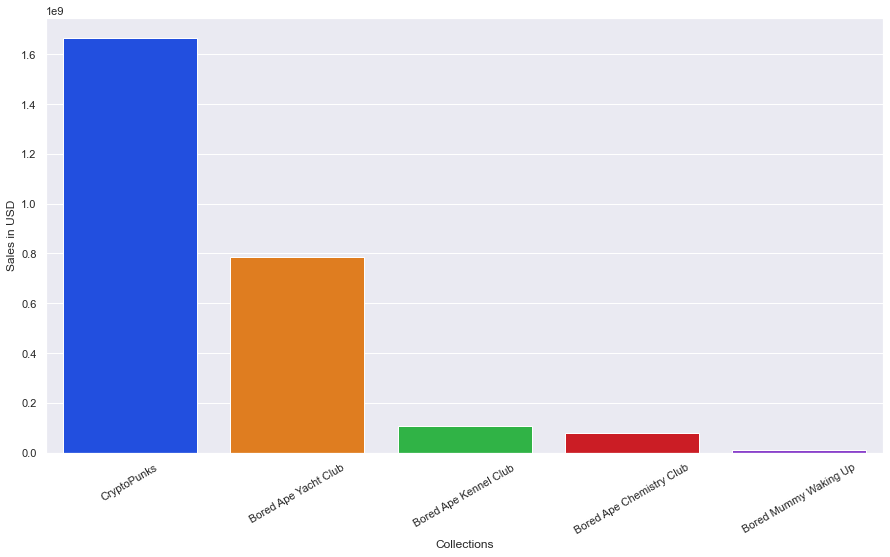

In [10]:
#Cryptopunks by far the most in terms of amount sold.
plt.figure(figsize = (15,8))
ax = sns.barplot(data=result, x='Collections', y='Sales in USD')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

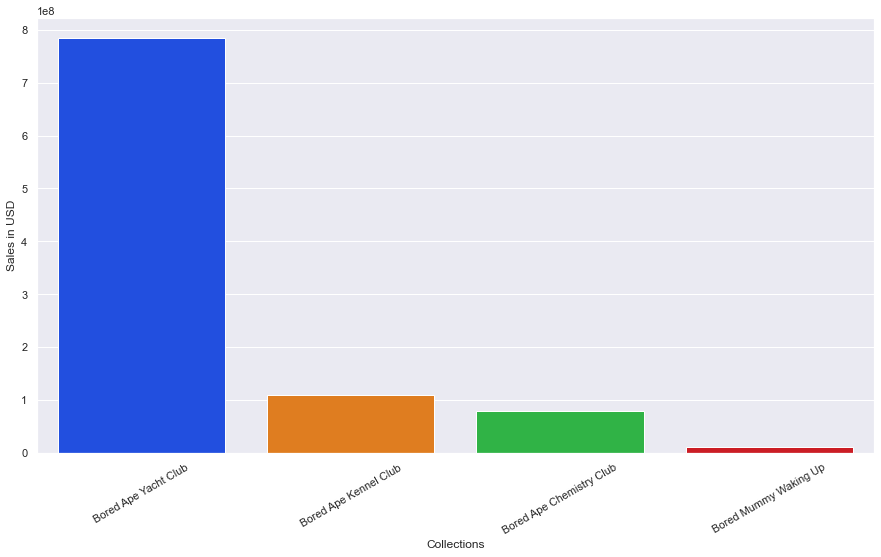

In [11]:
#Dialing into just the Bored Ape Collection.
plt.figure(figsize = (15,8))
ax = sns.barplot(data=bored_collection, x='Collections', y='Sales in USD')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

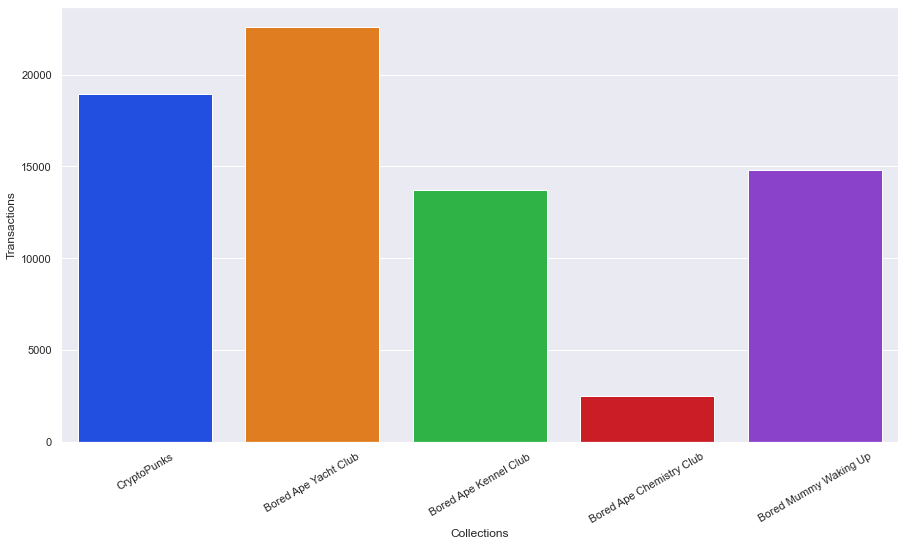

In [12]:
#The Bored Ape Collections have had some serious volume. Cryptopunks as well.
plt.figure(figsize = (15,8))
ax = sns.barplot(data=result, x='Collections', y='Transactions')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

In [13]:
df.sort_values(by='Sales in USD', ascending=False)

,Collections,Sales in USD,Buyers,Transactions,Owners
0,Axie Infinity,3328148500,1079811,9755511,2656431
1,CryptoPunks,1664246968,4723,18961,3289
2,Art Blocks,1075223906,20934,117602,25094
3,Bored Ape Yacht Club,783882186,8284,22584,5862
4,NBA Top Shot,781965423,374818,11790699,603928
5,Mutant Ape Yacht Club,422429206,10350,17343,10254
6,Loot,264652035,3571,9997,2555
7,Meebits,237519388,5112,13580,5361
8,Cool Cats,186937798,7960,23007,5029
9,CrypToadz,170407439,6277,15005,3525


In [14]:
top_10 = df.iloc[0:10,0:2]

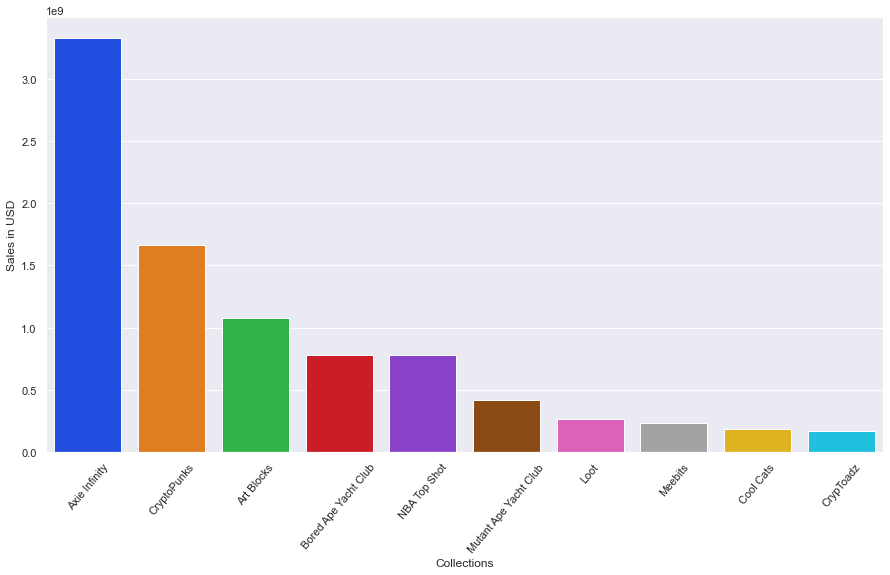

In [15]:
#Incredible sales of Axie Infinity
plt.figure(figsize = (15,8))
ax2 = sns.barplot(data=top_10, x='Collections', y='Sales in USD')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 50);

In [16]:
#Sales per collection as a % of total

def sales_per_total(row):
    
    g = row['Sales in USD'] # access the Sales in USD column
    
    sales_per_total = df['Sales in USD'].sum()
    
    return g / sales_per_total

# create a FantasyPoints/G column
df['% of Total Sales'] = df.apply(sales_per_total, axis=1)

df.head()

,Collections,Sales in USD,Buyers,Transactions,Owners,% of Total Sales
0,Axie Infinity,3328148500,1079811,9755511,2656431,0.228561
1,CryptoPunks,1664246968,4723,18961,3289,0.114292
2,Art Blocks,1075223906,20934,117602,25094,0.073841
3,Bored Ape Yacht Club,783882186,8284,22584,5862,0.053833
4,NBA Top Shot,781965423,374818,11790699,603928,0.053702


In [17]:
df.sort_values('% of Total Sales', ascending=False)

,Collections,Sales in USD,Buyers,Transactions,Owners,% of Total Sales
0,Axie Infinity,3328148500,1079811,9755511,2656431,0.228561
1,CryptoPunks,1664246968,4723,18961,3289,0.114292
2,Art Blocks,1075223906,20934,117602,25094,0.073841
3,Bored Ape Yacht Club,783882186,8284,22584,5862,0.053833
4,NBA Top Shot,781965423,374818,11790699,603928,0.053702
5,Mutant Ape Yacht Club,422429206,10350,17343,10254,0.029010
6,Loot,264652035,3571,9997,2555,0.018175
7,Meebits,237519388,5112,13580,5361,0.016312
8,Cool Cats,186937798,7960,23007,5029,0.012838
9,CrypToadz,170407439,6277,15005,3525,0.011703


In [18]:
top_10_percentage = df.iloc[0:10]

In [19]:
top_10_percentage

,Collections,Sales in USD,Buyers,Transactions,Owners,% of Total Sales
0,Axie Infinity,3328148500,1079811,9755511,2656431,0.228561
1,CryptoPunks,1664246968,4723,18961,3289,0.114292
2,Art Blocks,1075223906,20934,117602,25094,0.073841
3,Bored Ape Yacht Club,783882186,8284,22584,5862,0.053833
4,NBA Top Shot,781965423,374818,11790699,603928,0.053702
5,Mutant Ape Yacht Club,422429206,10350,17343,10254,0.029010
6,Loot,264652035,3571,9997,2555,0.018175
7,Meebits,237519388,5112,13580,5361,0.016312
8,Cool Cats,186937798,7960,23007,5029,0.012838
9,CrypToadz,170407439,6277,15005,3525,0.011703


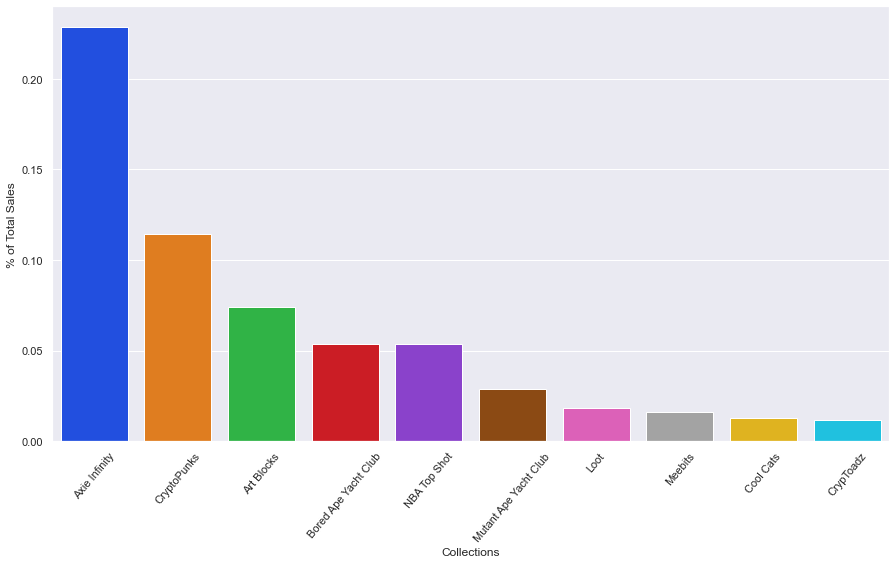

In [20]:
#Over 50% of the NFT market is concentrated in the top 10 category of this dataset (61%)
plt.figure(figsize = (15,8))
ax3 = sns.barplot(data=top_10_percentage, x='Collections', y='% of Total Sales')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 50);

In [21]:
top_10_percentage['% of Total Sales'].sum()

0.6122674018994477